In [1]:
%reset
import matplotlib.pyplot as plt
from PIL import Image
from keras.models import model_from_json
import urllib
import numpy as np
import pandas as pd
LETTERSTR = "0123456789" # domain for captcha letters, all 10 digits"

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


C:\Users\wicho\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# get new captcha image
def get_captcha(img_name):
    """
        download captcha image dynamically
    """
    try:
        urllib.request.urlretrieve("http://safind.scourt.go.kr/sf/captchaImg?t=image", img_name)
    except:
        return 1
    img = np.array(Image.open(img_name))
    imgplot = plt.imshow(img)
    plt.show()

# turn generated jpg file into 4-dim'l numpy array to put it in model
def preprocess_img(img_name, channel=3):
    data = (np.array(Image.open(img_name))/255.0)[:,:,channel]
    return data[np.newaxis, :, :, np.newaxis]

In [3]:
WEIGHTS = ['digit1_weights[1].h5',
           'digit2_weights[1].h5',
           'digit3_weights[1].h5',
           'digit4_weights[1].h5',
           'digit5_weights[1].h5',
           'digit6_weights[1].h5']
STRUCTURE = 'captcha_breaker[1].json'

In [4]:
class captcha_predictor:
    def __init__(self):
        self.structure = None
        self.weights = []
        self.models = []
        
    def load_structure(self, str_json):
        # needs 6 models each for each digit
        for i in range(6):
            with open(str_json, 'r') as f:
                self.models.append(model_from_json(f.read()))
            f.close()
        print('Model structure is loaded.')
        
    def show_structure(self):
        print(self.models[0].summary())
        
    # turn generated jpg file into 4-dim'l numpy array to put it in model
    def preprocess_img(self, img, channel=3):
        data = (np.array(Image.open(img))/255.0)[:,:,channel]
        return data[np.newaxis, :, :, np.newaxis]
    
    def load_weights(self, weights):
        self.models[0].load_weights(weights[0])
        self.models[1].load_weights(weights[1])
        self.models[2].load_weights(weights[2])
        self.models[3].load_weights(weights[3])
        self.models[4].load_weights(weights[4])
        self.models[5].load_weights(weights[5])
        print('Pre-trained weights are loaded.')
    
    def single_predictor(self, digit):
        return self.models[digit-1]
    
    def predict(self, data):
        #data = self.preprocess_img(img=img, channel=3)
        digit1 = np.argmax(self.single_predictor(digit=1).predict(data))
        digit2 = np.argmax(self.single_predictor(digit=2).predict(data))
        digit3 = np.argmax(self.single_predictor(digit=3).predict(data))
        digit4 = np.argmax(self.single_predictor(digit=4).predict(data))
        digit5 = np.argmax(self.single_predictor(digit=5).predict(data))
        digit6 = np.argmax(self.single_predictor(digit=6).predict(data))
        return str(digit1) + str(digit2) + str(digit3) + str(digit4) + str(digit5) + str(digit6)

Model structure is loaded.
Pre-trained weights are loaded.


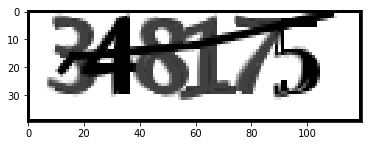

'348175'

In [5]:
my_model = captcha_predictor()
my_model.load_structure(STRUCTURE)
#my_model.show_structure()
my_model.load_weights(WEIGHTS)

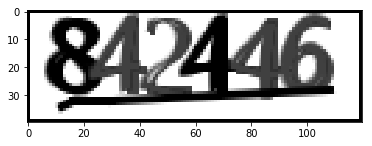

'842446'

In [102]:
test_img = './test.jpg'
get_captcha(test_img)
data = preprocess_img(img_name=test_img, channel=3)
my_model.predict(data)